In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [60]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

rows, columns = df.shape

print(f'Количество строк: {rows}')
print(f'Количество колонок: {columns}')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Количество строк: 517
Количество колонок: 13


In [61]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [63]:
vals = df["month"].unique()
vals

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [64]:
vals = df["day"].unique()
vals

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [65]:
cols_for_clusters = df.columns[:-1]
cols_for_clusters

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')

In [66]:
df_copy=df.copy()

In [67]:
month_encoder = LabelEncoder()
df['month'] = month_encoder.fit_transform(df['month'])

day_encoder = LabelEncoder()
df['day'] = day_encoder.fit_transform(df['day'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [69]:
# Определяем признаки (X) и целевую переменную (y)
X = df_copy.drop(columns=['area'])  # Признаки: все столбцы, кроме 'area'
y = df_copy[['area']].values  # Целевая переменная: 'area'

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Выбираем только числовые признаки
cols_for_clusters = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем X с числовыми признаками (все, кроме 'area')
X = df[cols_for_clusters].drop(columns=['area'])

# Масштабируем данные
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=cols_for_clusters.drop('area'))

# Целевая переменная - 'area'
y = df[['area']]

# Проверим результат
X_scaled.head(), y.head()


(          X         Y     month       day      FFMC       DMC        DC  \
 0  1.008313  0.569860  0.284222 -1.423121 -0.805959 -1.323326 -1.830477   
 1  1.008313 -0.244001  0.970871  1.176715 -0.008102 -1.179541  0.488891   
 2  1.008313 -0.244001  0.970871 -0.383187 -0.008102 -1.049822  0.560715   
 3  1.440925  1.383722  0.284222 -1.423121  0.191362 -1.212361 -1.898266   
 4  1.440925  1.383722  0.284222  0.136781 -0.243833 -0.931043 -1.798600   
 
         ISI      temp        RH      wind      rain  
 0 -0.860946 -1.842640  0.411724  1.498614 -0.073268  
 1 -0.509688 -0.153278 -0.692456 -1.741756 -0.073268  
 2 -0.509688 -0.739383 -0.692456 -1.518282 -0.073268  
 3 -0.004756 -1.825402  3.233519 -0.009834  0.603155  
 4  0.126966 -1.291012  3.356206 -1.238940 -0.073268  ,
    area
 0   0.0
 1   0.0
 2   0.0
 3   0.0
 4   0.0)

Выбор числовых признаков: были выбраны только числовые столбцы с типами данных int64 и float64 с помощью select_dtypes(include=['float64', 'int64']).

Создание признаков X: был создан массив признаков, исключающий целевую переменную area с помощью drop(columns=['area']).

Масштабирование данных: применение StandardScaler для стандартизации данных, т.е. для приведения всех признаков к единой шкале (среднее значение 0 и стандартное отклонение 1). Затем, метод fit_transform() обучает стандартализатор на данных и сразу применяет масштабирование. Результат преобразуется в DataFrame с исходными именами столбцов.

Целевая переменная y: выделяется целевая переменная area, которая будет использована в качестве метки для модели.

        PC1       PC2  area
0 -3.460144  0.750305   0.0
1 -0.134853 -0.408863   0.0
2 -0.553495 -0.568605   0.0
3 -3.227723  2.169419   0.0
4 -2.665221  2.069200   0.0


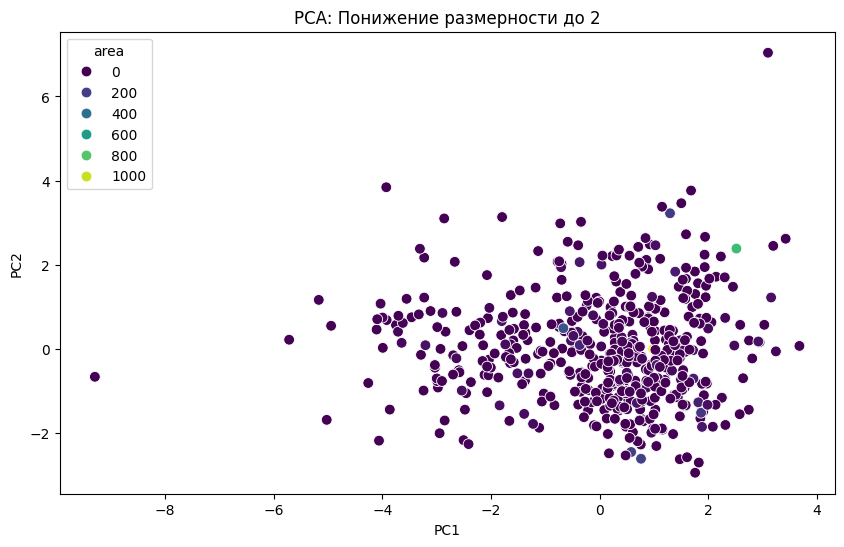

In [71]:
from sklearn.decomposition import PCA

# Применяем PCA для снижения размерности до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Преобразуем результат в DataFrame для удобства визуализации
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Добавим целевую переменную для анализа
pca_df['area'] = y

# Выведем результаты
print(pca_df.head())

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='area', data=pca_df, palette='viridis', s=60)
plt.title('PCA: Понижение размерности до 2')
plt.show()


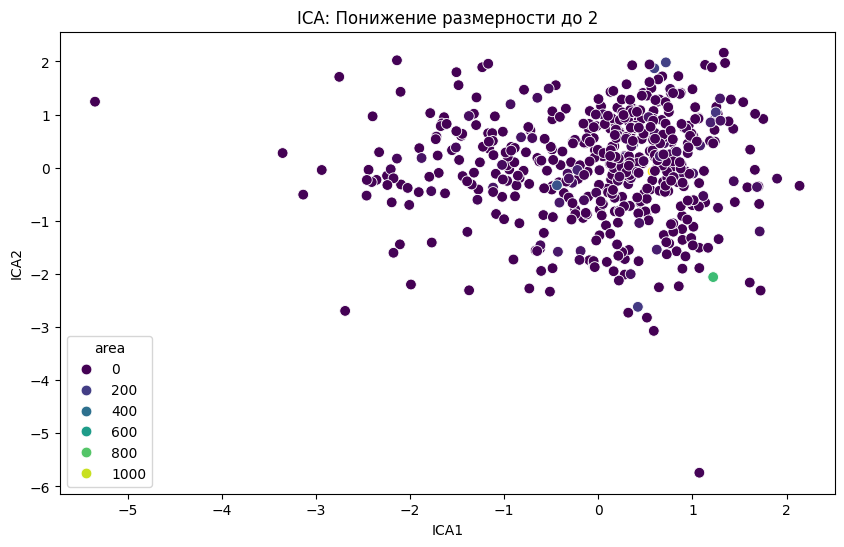

In [72]:
from sklearn.decomposition import FastICA

# Применяем ICA для снижения размерности до 2
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Преобразуем результат в DataFrame для удобства визуализации
ica_df = pd.DataFrame(X_ica, columns=['ICA1', 'ICA2'])

# Добавим целевую переменную для анализа
ica_df['area'] = y

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ICA1', y='ICA2', hue='area', data=ica_df, palette='viridis', s=60)
plt.title('ICA: Понижение размерности до 2')
plt.show()


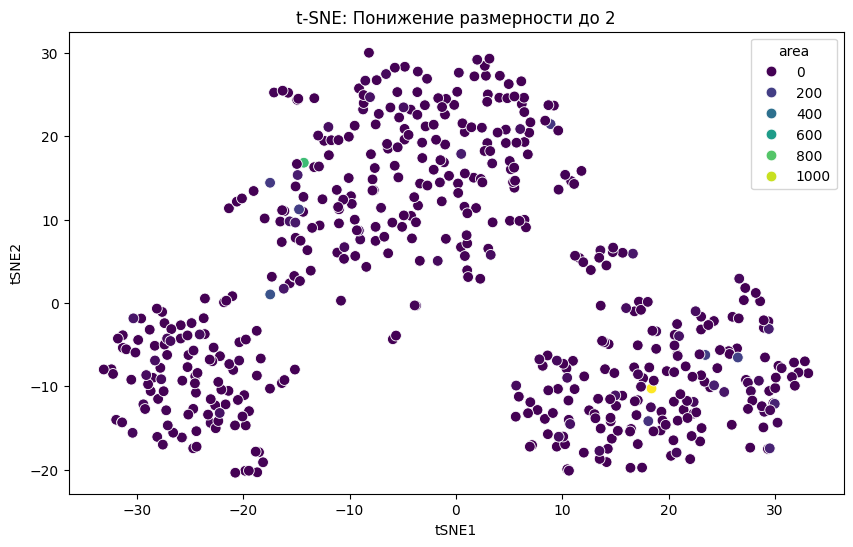

In [73]:
from sklearn.manifold import TSNE

# Применяем t-SNE для снижения размерности до 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Преобразуем результат в DataFrame для удобства визуализации
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])

# Добавим целевую переменную для анализа
tsne_df['area'] = y

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='area', data=tsne_df, palette='viridis', s=60)
plt.title('t-SNE: Понижение размерности до 2')
plt.show()


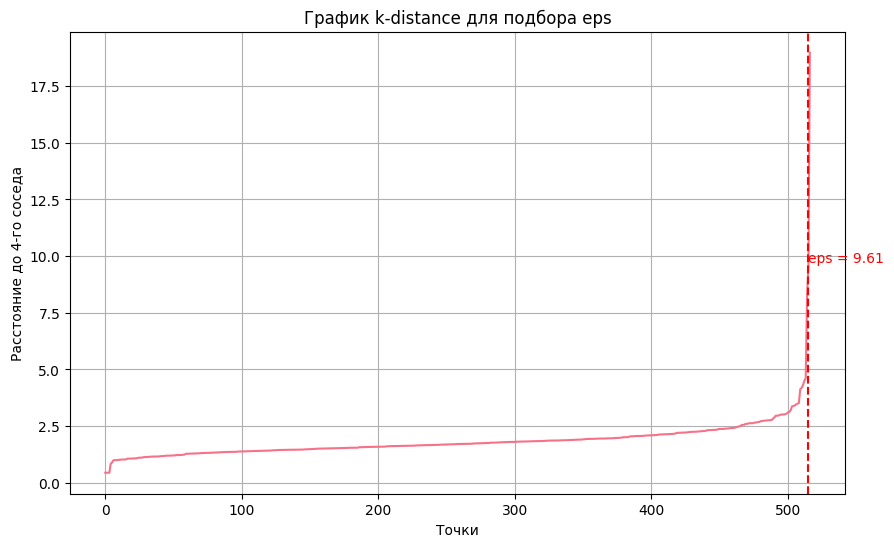

Оптимальное значение eps: 9.61


In [74]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Выбираем k (например, 4 — это минимальное количество соседей)
k = 4

# Находим k ближайших соседей
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Для каждого наблюдения берём максимальное расстояние до k-го соседа
distances = np.sort(distances[:, k-1], axis=0)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('График k-distance для подбора eps')
plt.xlabel('Точки')
plt.ylabel(f'Расстояние до {k}-го соседа')

# Ищем "колено" на графике — точку, где происходит резкое увеличение
# Например, можно выбрать точку с наибольшим изменением между соседними значениями
diff = np.diff(distances)
knee_point = np.argmax(diff)  # Находим точку, где изменение максимальное

# Отображаем на графике точку колена
plt.axvline(x=knee_point, color='r', linestyle='--')
plt.text(knee_point, distances[knee_point], f'eps = {distances[knee_point]:.2f}', color='red',
         horizontalalignment='left', verticalalignment='bottom')

# Показываем график
plt.grid(True)
plt.show()

# Печатаем числовое значение eps (колено)
print(f"Оптимальное значение eps: {distances[knee_point]:.2f}")


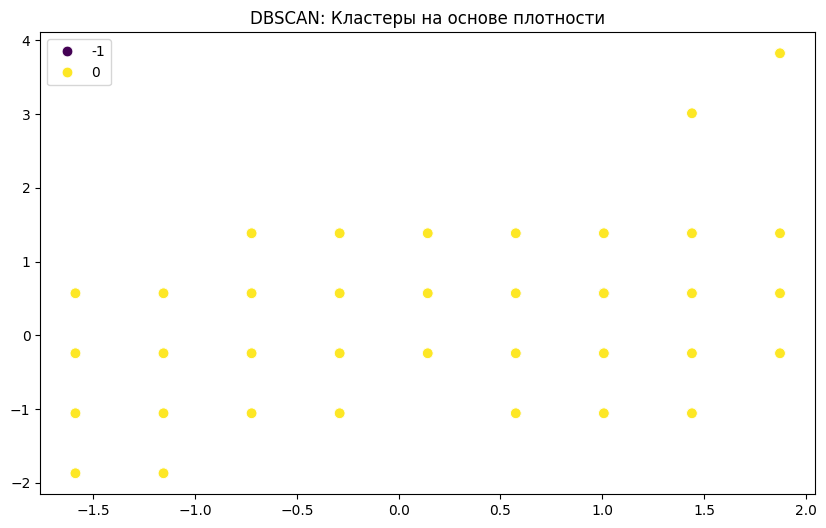

Количество кластеров: 1
Количество точек, отнесенных к шуму (кластер -1): 1


In [75]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем DBSCAN с найденным eps
dbscan = DBSCAN(eps=9.61, min_samples=5)  # Используем eps=9.61
clusters = dbscan.fit_predict(X_scaled)

# Добавляем кластерные метки к DataFrame
df['cluster'] = clusters

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('DBSCAN: Кластеры на основе плотности')
plt.show()

# Посмотрим, какие кластеры были выделены
print(f"Количество кластеров: {len(set(clusters)) - (1 if -1 in clusters else 0)}")  # -1 — шум
print(f"Количество точек, отнесенных к шуму (кластер -1): {list(clusters).count(-1)}")


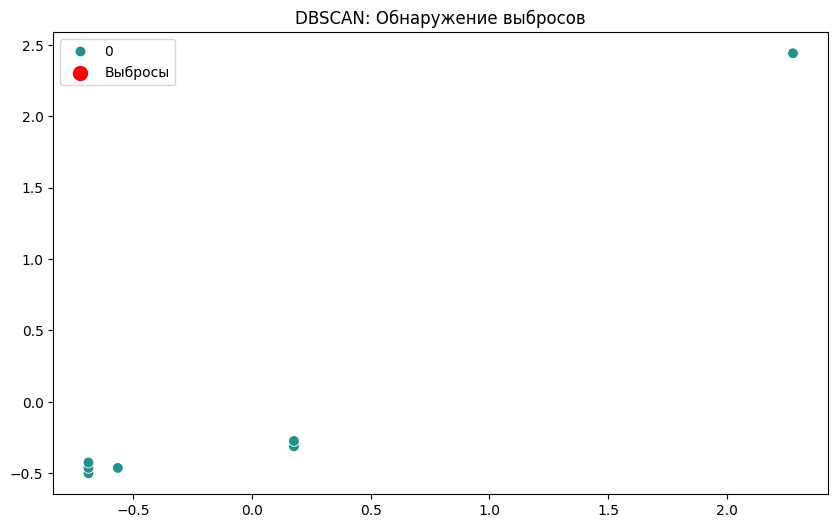

Количество выбросов (кластер -1): 0


In [76]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных X
X = [[1, 2], [1, 3], [1, 4], [2, 3], [8, 7], [8, 8], [25, 80]]  # Пример с выбросом

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем DBSCAN для выявления выбросов
dbscan = DBSCAN(eps=9.61, min_samples=2)  # Настроим eps и min_samples
clusters = dbscan.fit_predict(X_scaled)

# Добавляем кластерные метки
outliers = clusters == -1  # Выбросы будут иметь метку -1

# Визуализация кластеров и выбросов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('DBSCAN: Обнаружение выбросов')
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], color='red', s=100, label='Выбросы')
plt.legend()
plt.show()

# Выводим информацию о выбросах
print(f"Количество выбросов (кластер -1): {list(clusters).count(-1)}")
